# A genetic algorithm for optimizing traveling salesman problem

https://github.com/luthfishahab/geneticalgorithm
https://www.theprojectspot.com/tutorial-post/applying-a-genetic-algorithm-to-the-travelling-salesman-problem/5

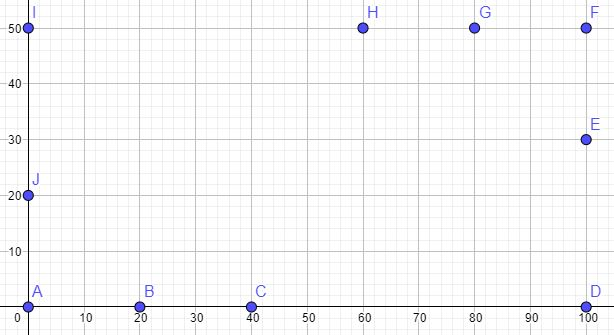

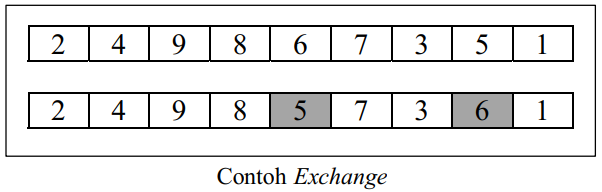

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 20, 40, 100, 100, 100, 80, 60,  0,  0, 40, 40, 60, 50, 30, 90, 10, 20, 60, 80])
y = np.array([0,  0,  0,   0,  30,  50, 50, 50, 50, 20, 20, 30, 20, 25, 10, 15, 30, 40, 40, 40])

In [3]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 100

# maximum generation
N = 200

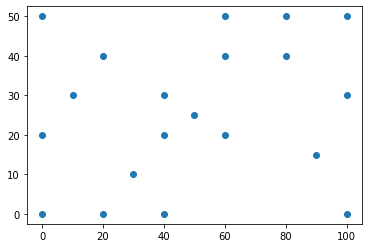

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
# distance matrix
d = np.zeros((m, m), dtype=int)

for i in range(m):
    for j in range(m):
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[  0,  20,  40, 100, 104, 111,  94,  78,  50,  20,  44,  50,  63,
         55,  31,  91,  31,  44,  72,  89],
       [ 20,   0,  20,  80,  85,  94,  78,  64,  53,  28,  28,  36,  44,
         39,  14,  71,  31,  40,  56,  72],
       [ 40,  20,   0,  60,  67,  78,  64,  53,  64,  44,  20,  30,  28,
         26,  14,  52,  42,  44,  44,  56],
       [100,  80,  60,   0,  30,  50,  53,  64, 111, 101,  63,  67,  44,
         55,  70,  18,  94,  89,  56,  44],
       [104,  85,  67,  30,   0,  20,  28,  44, 101, 100,  60,  60,  41,
         50,  72,  18,  90,  80,  41,  22],
       [111,  94,  78,  50,  20,   0,  20,  40, 100, 104,  67,  63,  50,
         55,  80,  36,  92,  80,  41,  22],
       [ 94,  78,  64,  53,  28,  20,   0,  20,  80,  85,  50,  44,  36,
         39,  64,  36,  72,  60,  22,  10],
       [ 78,  64,  53,  64,  44,  40,  20,   0,  60,  67,  36,  28,  30,
         26,  50,  46,  53,  41,  10,  22],
       [ 50,  53,  64, 111, 101, 100,  80,  60,   0,  30,  50,  

In [6]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)
    
    for i in range(n):
        pop[i] = np.random.permutation(m)
    
    pop = pd.DataFrame(pop)
    
    return pop

In [7]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)
    
    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b
    
    pop['fitness'] = fitness
    
    return pop

In [8]:
# Belum dirubah
def randomSelection():
    position = np.random.permutation(n)
    
    return position[0], position[1]

In [9]:
# Belum dirubah
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection()
        x = (pop.loc[a] + pop.loc[b])/2
        popc.loc[i] = x
    
    return popc

In [10]:
def mutation(pop):
    popm = pop.copy()
    
    for i in range(n):
        position = np.random.permutation(m)
        a = position[0]
        b = position[1]
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [11]:
def combinePopulation(pop, popm):
    popAll = pop.copy()
    popAll = popAll.append(popm)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [12]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [13]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [16]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = a[0]
    b[m] = b[0]

    plt.plot(a, b, marker = 'o')
    plt.show()

Populasi awal
    0  1  2  3  4   5   6  7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  16  0  8  2  6  11  15  7  4  14  ...  10  18   1  12   5  17  19   9  13   

   fitness  
0     1090  

[1 rows x 21 columns]


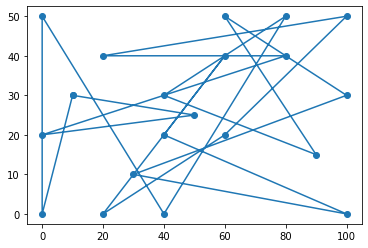


1
    0  1   2  3  4  5   6   7   8  9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  14  6  2  9  16  11  10  0  ...  12  17   7  13  15   3   5   4  19   

   fitness  
0      726  

[1 rows x 21 columns]


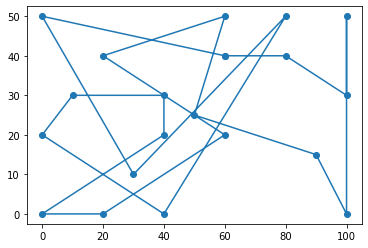


2
    0  1   2   3   4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  \
0  12  1  16  14  11  0  2  3  15  10  ...   9  17   6   7   5  19   4  13   

   19  fitness  
0  18      703  

[1 rows x 21 columns]


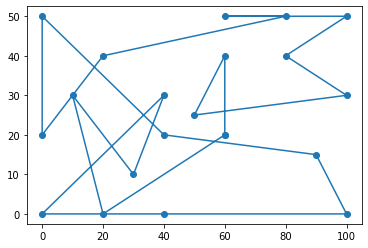


3
    0  1   2   3   4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  \
0  12  1  16  14  11  0  2  3  15  10  ...   9  17   6   7   5  19   4  13   

   19  fitness  
0  18      703  

[1 rows x 21 columns]


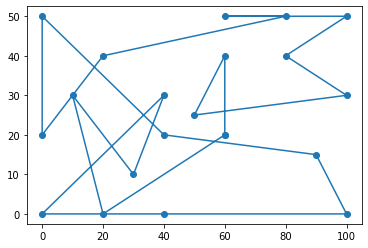


4
    0  1   2   3   4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  \
0  12  1  16  14  11  0  2  3  15  10  ...   9  17   6   7   5  19   4  13   

   19  fitness  
0  18      703  

[1 rows x 21 columns]


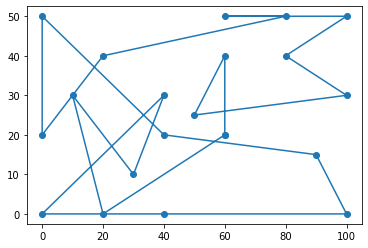


5
    0  1   2   3   4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  \
0  12  1  16  14  11  0  2  3  15  10  ...   9  17   6   7   5  19   4  13   

   19  fitness  
0  18      703  

[1 rows x 21 columns]


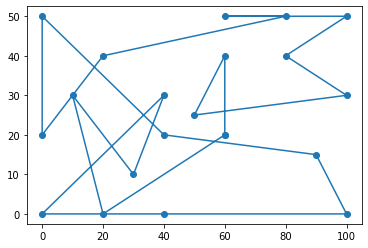


6
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  14  13  9  2  1  0  10  11  ...  12  17   7   6  15   3   5   4  19   

   fitness  
0      674  

[1 rows x 21 columns]


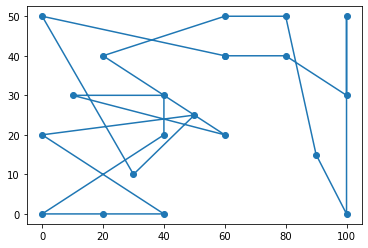


7
    0  1  2  3  4   5  6   7   8  9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  7  6  2  16  9  11  17  0  ...  12  10  14  13  15   3   5   4  19   

   fitness  
0      661  

[1 rows x 21 columns]


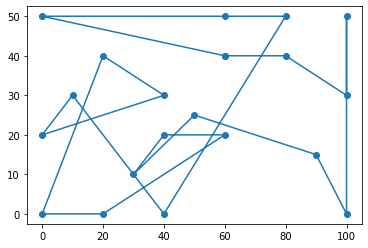


8
    0  1   2   3   4  5  6  7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  14  13  10  2  1  0  9  11  ...  12  17   7   6  15   3   5   4  19   

   fitness  
0      618  

[1 rows x 21 columns]


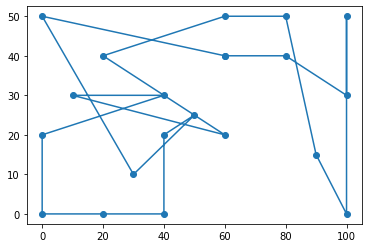


9
    0  1   2   3   4  5  6  7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  14  13  10  2  1  0  9  11  ...  12  17   7   6  15   3   5   4  19   

   fitness  
0      618  

[1 rows x 21 columns]


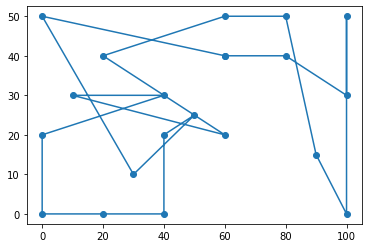


10
    0  1   2   3   4  5  6  7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  14  13  10  2  1  0  9  11  ...  12  17   7   6  15   3   5   4  19   

   fitness  
0      618  

[1 rows x 21 columns]


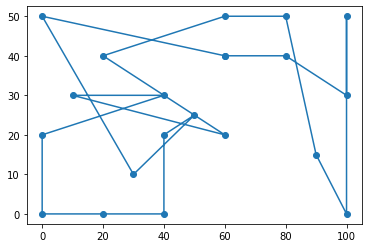


11
    0   1   2   3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  18  12  14  16  2  0  9  11  10  13  ...   8  17   7   6  15   3   5   4   

   19  fitness  
0  19      584  

[1 rows x 21 columns]


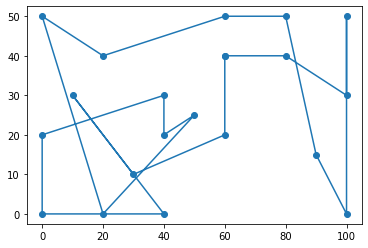


12
    0   1   2  3   4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  18  12  14  2  16  0  9  11  10  13  ...   8  17   7   6  15   3   5   4   

   19  fitness  
0  19      561  

[1 rows x 21 columns]


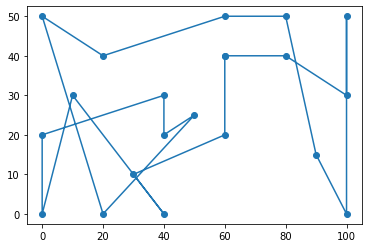


13
    0   1   2  3   4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  18  12  14  2  16  0  9  11  10  13  ...   8  17   7   6  15   3   5   4   

   19  fitness  
0  19      561  

[1 rows x 21 columns]


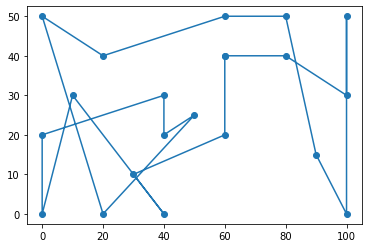


14
    0   1   2  3   4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  18  12  14  2  16  0  9  11  10  13  ...   8  17   7   6  15   3   4   5   

   19  fitness  
0  19      541  

[1 rows x 21 columns]


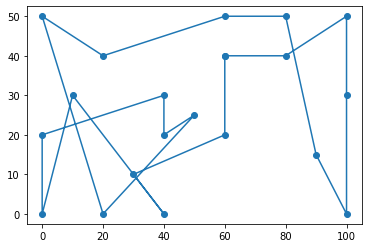


15
   0   1   2  3   4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  6  12  14  2  16  0  9  11  10  13  ...   8  17   7  18  15   3   4   5   

   19  fitness  
0  19      540  

[1 rows x 21 columns]


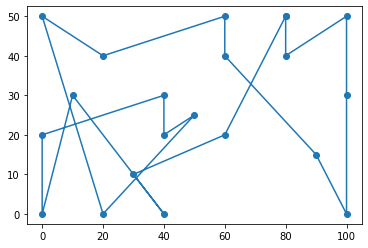


16
   0   1   2  3   4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  6  12  14  2  16  0  9  11  10  13  ...   8  17   7  18  15   3   4   5   

   19  fitness  
0  19      540  

[1 rows x 21 columns]


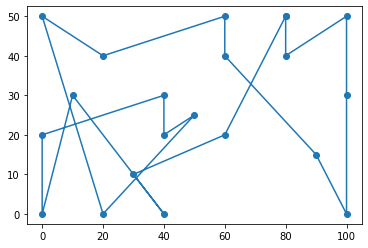


17
   0   1   2  3   4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  6  12  14  2  16  0  9  11  10  13  ...   8  17   7  18  15   3   4   5   

   19  fitness  
0  19      540  

[1 rows x 21 columns]


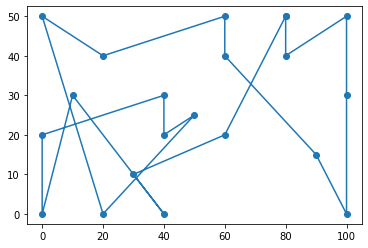


18
   0   1   2  3   4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  6  12  14  2  16  0  9  11  10  13  ...   8  17   7  18  15   3   4   5   

   19  fitness  
0  19      540  

[1 rows x 21 columns]


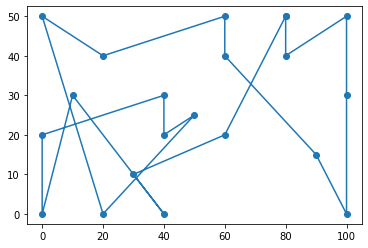


19
   0   1   2  3   4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  6  12  14  2  16  0  9  11  10  13  ...   8  17   7  18  15   3   4   5   

   19  fitness  
0  19      540  

[1 rows x 21 columns]


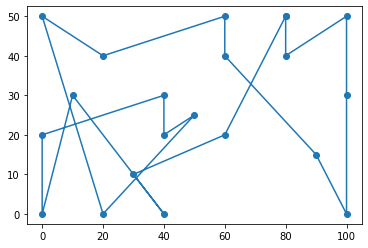


20
   0   1   2  3   4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  6  12  14  2  16  0  9  11  10  13  ...   8  17   7  18  15   3   4   5   

   19  fitness  
0  19      540  

[1 rows x 21 columns]


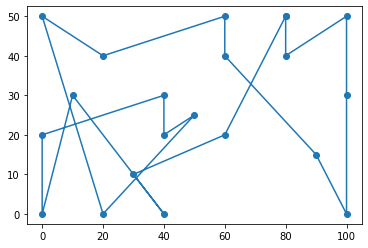


21
   0   1   2   3   4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  \
0  6  12  14  11  16  8  9  0  10  13  ...   2  17   7  18  15   3   4   5   

   19  fitness  
0  19      539  

[1 rows x 21 columns]


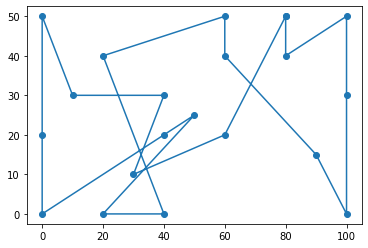


22
    0   1   2   3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  18  12  14  16  9  0  1  11  10  13  ...   8  17   7   6  15   3   5   4   

   19  fitness  
0  19      529  

[1 rows x 21 columns]


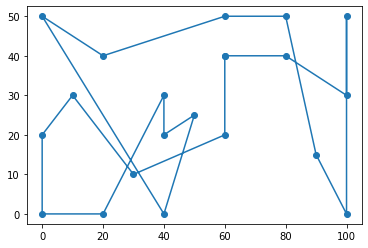


23
    0   1   2   3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  18  12  14  16  9  0  1  11  10  13  ...   8  17   7   6  15   3   5   4   

   19  fitness  
0  19      529  

[1 rows x 21 columns]


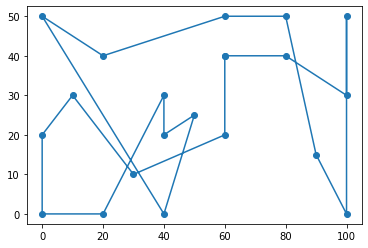


24
    0   1   2   3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  18  12  14  16  9  0  1  11  10  13  ...   8  17   7   6  15   3   5   4   

   19  fitness  
0  19      529  

[1 rows x 21 columns]


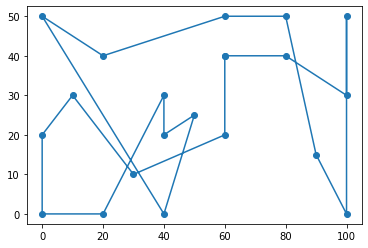


25
   0   1   2   3   4  5  6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  11  14  17  10  2  1  0  9  8  ...  12  13  18   4  15   3   5   6  19   

   fitness  
0      499  

[1 rows x 21 columns]


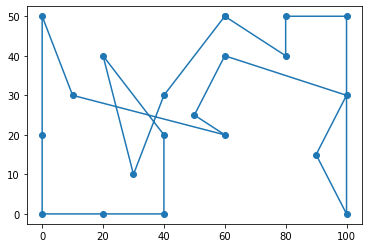


26
   0   1   2   3   4  5  6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  11  14  17  10  2  1  0  9  8  ...  12  13  18   4  15   3   5   6  19   

   fitness  
0      499  

[1 rows x 21 columns]


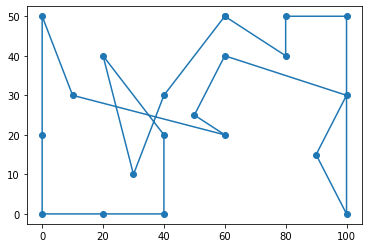


27
   0   1   2   3   4  5  6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  11  14  17  10  2  1  0  9  8  ...  12  13  18   4  15   3   5   6  19   

   fitness  
0      499  

[1 rows x 21 columns]


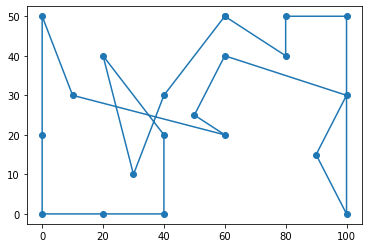


28
   0   1   2   3   4  5  6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  11  14  17  10  2  1  0  9  8  ...  12  13  18   4  15   3   5   6  19   

   fitness  
0      499  

[1 rows x 21 columns]


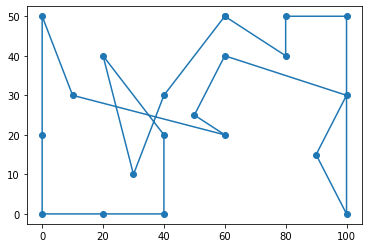


29
   0   1   2   3   4  5  6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  11  14  17  10  2  1  0  9  8  ...  12  13  18   4  15   3   5   6  19   

   fitness  
0      499  

[1 rows x 21 columns]


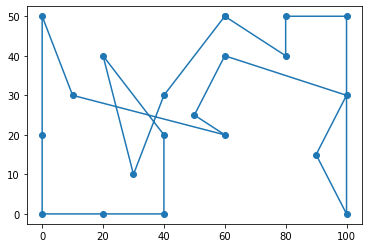


30
   0   1   2  3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  14  2  1  0  9  11  10  13  ...   8  17   7  18   4   3  15  19   5   

   fitness  
0      495  

[1 rows x 21 columns]


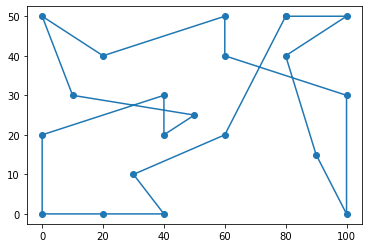


31
   0   1   2  3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  14  2  1  0  9  11  10  13  ...   8  17   7  18   4   3  15  19   5   

   fitness  
0      495  

[1 rows x 21 columns]


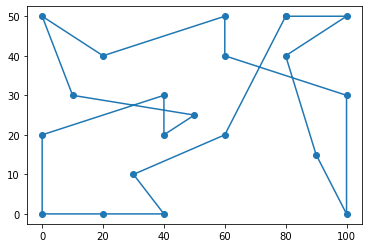


32
   0   1   2  3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  14  2  1  0  9  11  10  13  ...   8  17   7  18   4   3  15  19   5   

   fitness  
0      495  

[1 rows x 21 columns]


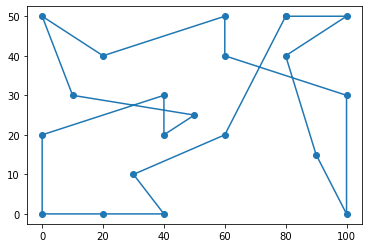


33
   0   1   2  3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  14  2  1  0  9  11  10  13  ...   8  17   7  18   4   3  15  19   5   

   fitness  
0      495  

[1 rows x 21 columns]


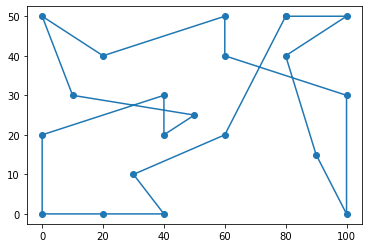


34
   0   1   2  3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  14  2  1  0  9  11  10  13  ...   8  17   7  18   4   3  15  19   5   

   fitness  
0      495  

[1 rows x 21 columns]


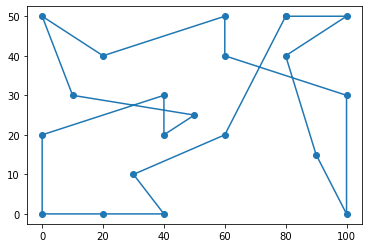


35
   0   1   2  3  4  5  6   7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  14  2  1  0  9  11  10  13  ...   8  17   7  18   4   3  15  19   5   

   fitness  
0      495  

[1 rows x 21 columns]


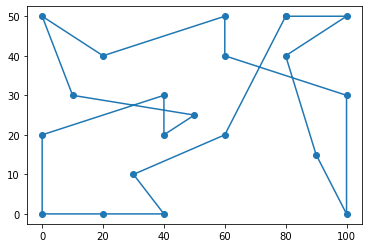


36
    0  1   2   3  4  5   6  7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  12  8  17  16  0  1  14  2  9  11  ...  13  18   7   6  15   3   4   5  19   

   fitness  
0      490  

[1 rows x 21 columns]


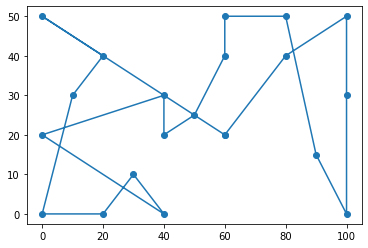


37
    0  1   2   3  4  5   6  7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  12  8  17  16  0  1  14  2  9  11  ...  13  18   7   6  15   3   4   5  19   

   fitness  
0      490  

[1 rows x 21 columns]


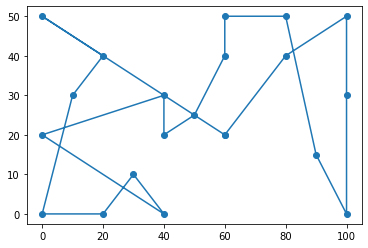


38
    0  1   2   3  4  5   6  7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  0  1  14  2  9  11  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      488  

[1 rows x 21 columns]


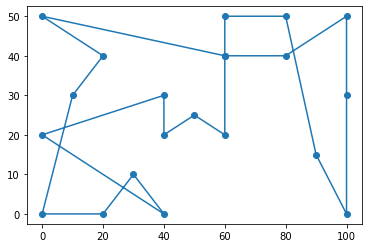


39
   0   1   2   3   4  5  6  7   8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  0  10  2  ...  14  16   7  18  15   3   4   5  19   

   fitness  
0      480  

[1 rows x 21 columns]


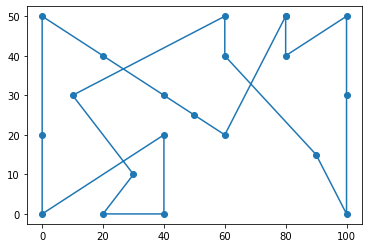


40
   0   1   2   3   4  5  6  7   8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  0  10  2  ...  14  16   7  18  15   3   4   5  19   

   fitness  
0      480  

[1 rows x 21 columns]


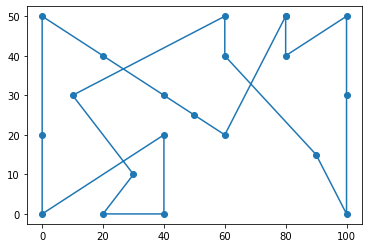


41
   0   1   2   3   4  5  6  7   8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  0  10  2  ...  14  16   7  18  15   3   4   5  19   

   fitness  
0      480  

[1 rows x 21 columns]


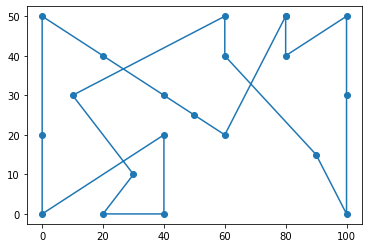


42
   0   1   2   3   4  5  6  7   8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  0  10  2  ...  14  16   7  18  15   3   4   5  19   

   fitness  
0      480  

[1 rows x 21 columns]


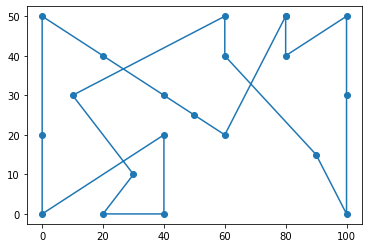


43
   0   1   2   3   4  5  6  7   8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  0  10  2  ...  14  16   7  18  15   3   4   5  19   

   fitness  
0      480  

[1 rows x 21 columns]


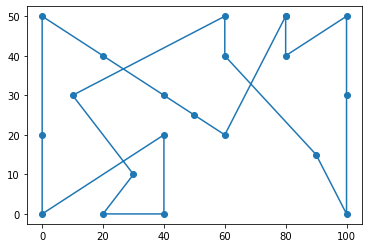


44
   0   1   2   3   4  5  6  7   8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  0  10  2  ...  14  16   7  18  15   3   4   5  19   

   fitness  
0      480  

[1 rows x 21 columns]


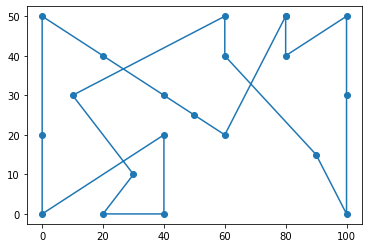


45
   0  1   2   3   4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  13  17  16  8  9  0  10  11  ...   2  14  12  18  15   3   4   5  19   

   fitness  
0      479  

[1 rows x 21 columns]


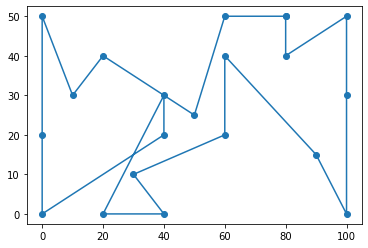


46
   0  1   2   3   4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  13  17  16  8  9  0  10  11  ...   2  14  12  18  15   3   4   5  19   

   fitness  
0      479  

[1 rows x 21 columns]


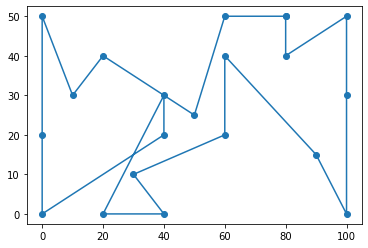


47
   0  1   2   3   4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  13  17  16  8  9  0  10  11  ...   2  14  12  18  15   3   4   5  19   

   fitness  
0      479  

[1 rows x 21 columns]


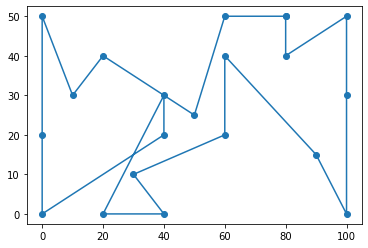


48
    0   1   2   3   4  5  6  7  8   9  ...  11  12  13  14  15  16  17  18  \
0  19  12  13  11  17  8  9  0  2  10  ...  14  16   7  18  15   3   4   5   

   19  fitness  
0   6      474  

[1 rows x 21 columns]


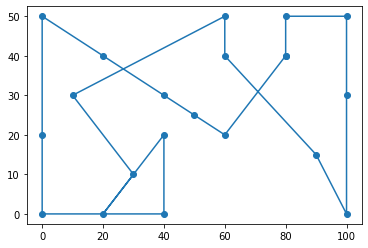


49
    0   1   2   3   4  5  6  7  8   9  ...  11  12  13  14  15  16  17  18  \
0  19  12  13  11  17  8  9  0  2  10  ...  14  16   7  18  15   3   4   5   

   19  fitness  
0   6      474  

[1 rows x 21 columns]


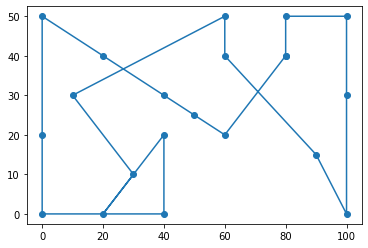


50
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  5  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   6  19   

   fitness  
0      472  

[1 rows x 21 columns]


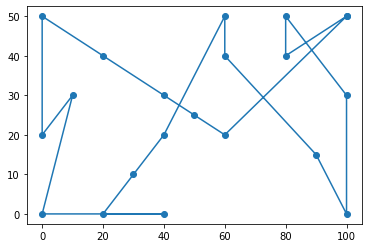


51
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  5  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   6  19   

   fitness  
0      472  

[1 rows x 21 columns]


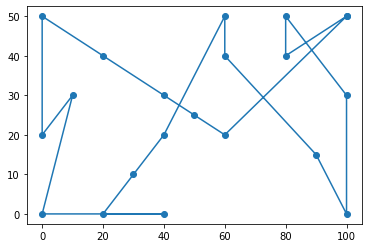


52
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  5  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   6  19   

   fitness  
0      472  

[1 rows x 21 columns]


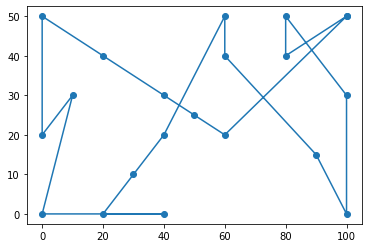


53
    0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  19  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   6   

   19  fitness  
0   5      460  

[1 rows x 21 columns]


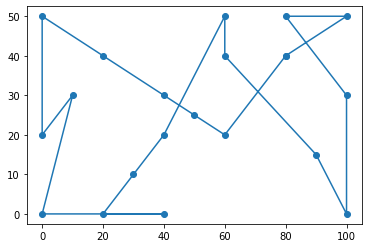


54
    0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  19  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   6   

   19  fitness  
0   5      460  

[1 rows x 21 columns]


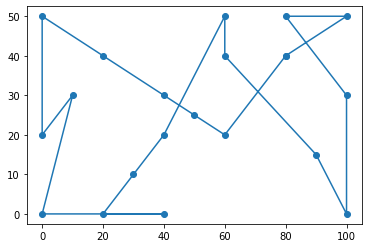


55
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


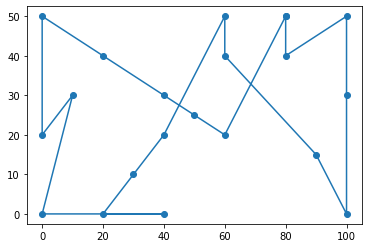


56
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


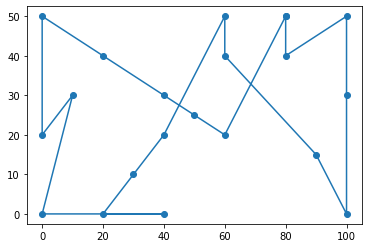


57
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


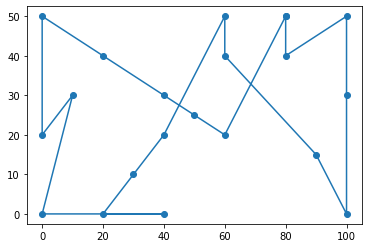


58
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


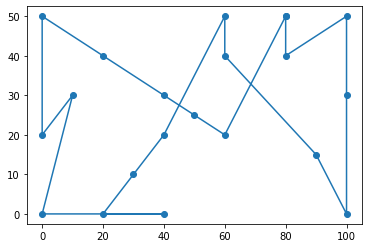


59
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


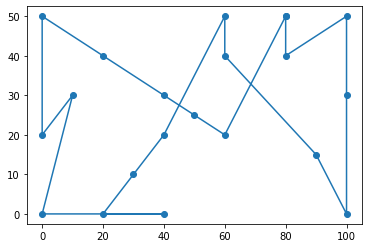


60
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


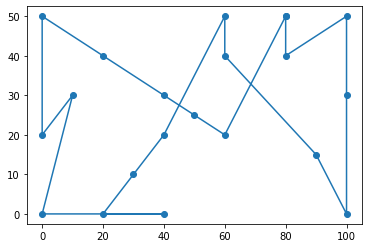


61
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


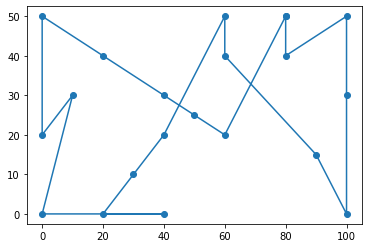


62
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


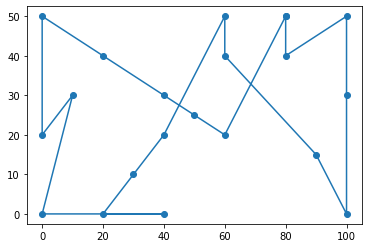


63
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


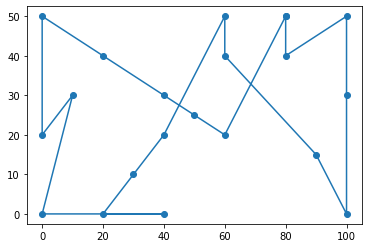


64
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


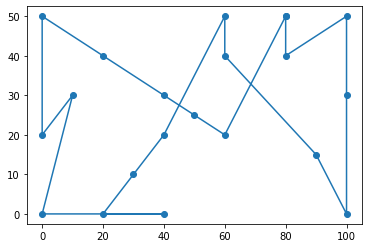


65
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


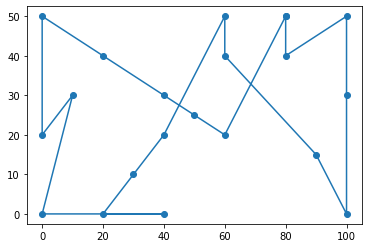


66
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


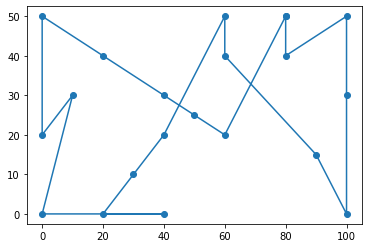


67
   0   1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  12  13  11  17  8  9  16  0  2  ...  14  10   7  18  15   3   4   5  19   

   fitness  
0      450  

[1 rows x 21 columns]


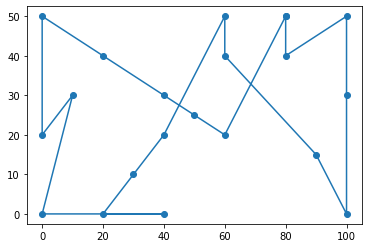


68
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  12  8  17  16  9  0  1  2  14  11  ...  13  18   7   6  15   3   4   5  19   

   fitness  
0      436  

[1 rows x 21 columns]


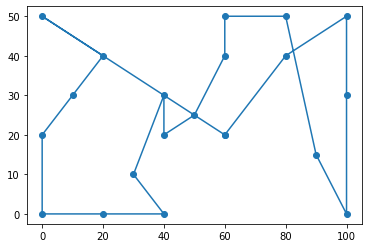


69
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  11  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      434  

[1 rows x 21 columns]


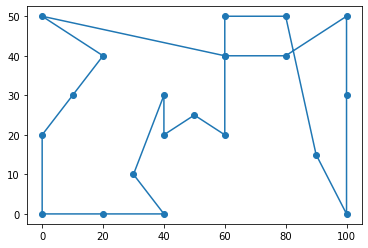


70
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  11  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      434  

[1 rows x 21 columns]


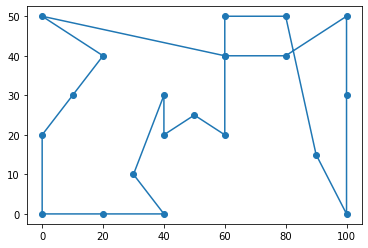


71
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  11  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      434  

[1 rows x 21 columns]


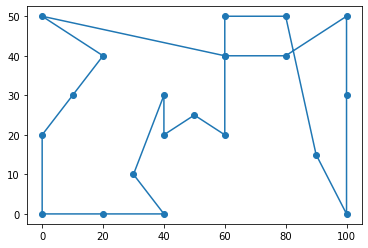


72
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  11  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      434  

[1 rows x 21 columns]


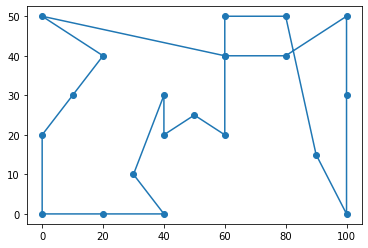


73
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  11  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      434  

[1 rows x 21 columns]


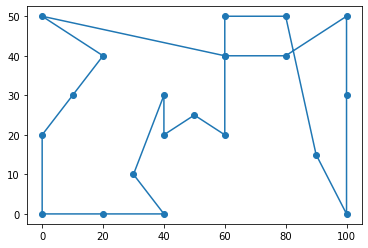


74
    0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  18  12  13  11  17  8  16  9  0  2  ...  14  10   7   6  15   3   4   5   

   19  fitness  
0  19      432  

[1 rows x 21 columns]


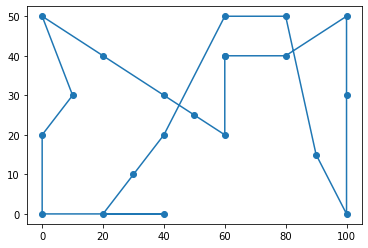


75
    0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  18  12  13  11  17  8  16  9  0  2  ...  14  10   7   6  15   3   4   5   

   19  fitness  
0  19      432  

[1 rows x 21 columns]


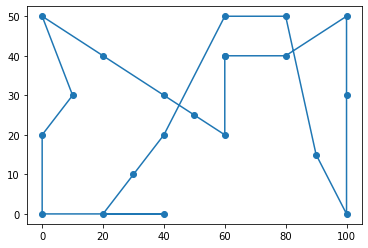


76
   0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  8  17  16  9  0  1  2  14  11  ...  13  12  18   6  15   3   4   5  19   

   fitness  
0      428  

[1 rows x 21 columns]


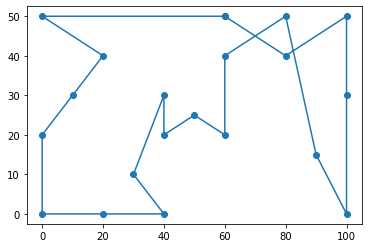


77
   0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  8  17  16  9  0  1  2  14  11  ...  13  12  18   6  15   3   4   5  19   

   fitness  
0      428  

[1 rows x 21 columns]


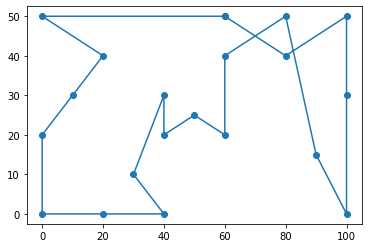


78
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  10  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      426  

[1 rows x 21 columns]


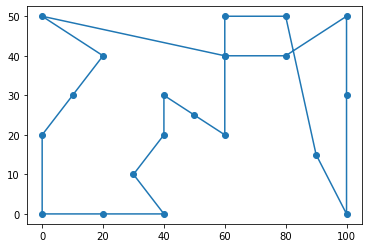


79
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  10  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      426  

[1 rows x 21 columns]


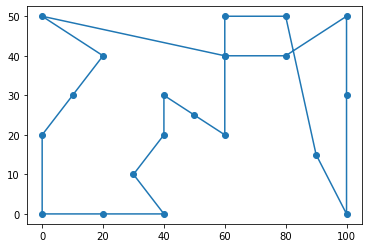


80
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  10  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      426  

[1 rows x 21 columns]


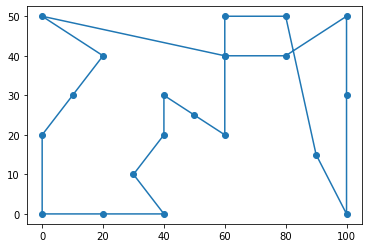


81
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  10  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      426  

[1 rows x 21 columns]


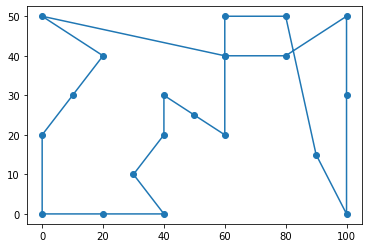


82
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  10  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      426  

[1 rows x 21 columns]


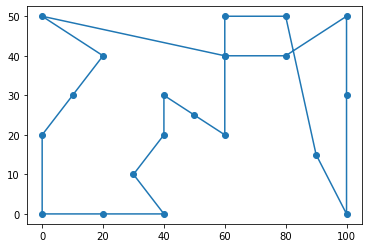


83
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  10  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      426  

[1 rows x 21 columns]


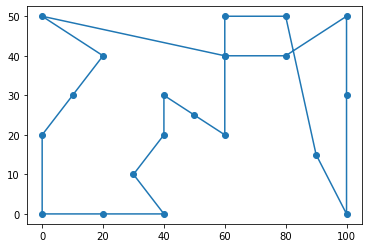


84
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  10  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      426  

[1 rows x 21 columns]


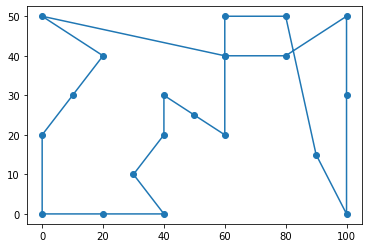


85
    0  1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  8  17  16  9  0  1  2  14  10  ...  13  12   7   6  15   3   4   5  19   

   fitness  
0      426  

[1 rows x 21 columns]


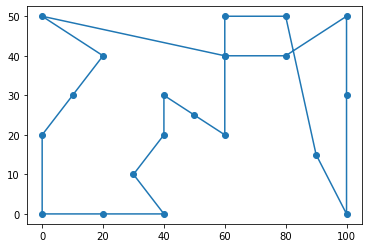


86
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  12  13  17  16  8  9  0  ...  14  10   2   3  15   4   5  19   

   19  fitness  
0   6      420  

[1 rows x 21 columns]


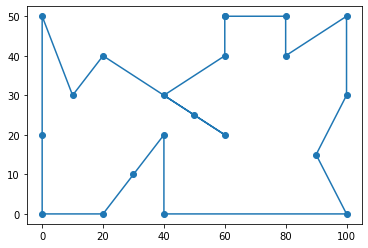


87
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  12  13  17  16  8  9  0  ...  14  10   2   3  15   4   5  19   

   19  fitness  
0   6      420  

[1 rows x 21 columns]


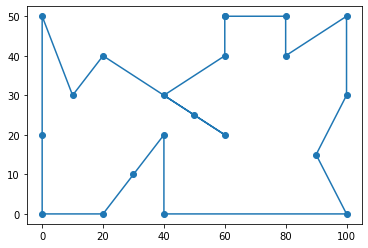


88
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  12  13  17  16  8  9  0  ...  14  10   2   3  15   4   5  19   

   19  fitness  
0   6      420  

[1 rows x 21 columns]


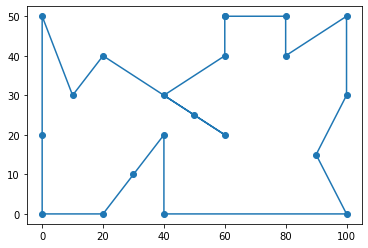


89
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  12  13  17  16  8  9  0  ...  14  10   2   3  15   4   5  19   

   19  fitness  
0   6      420  

[1 rows x 21 columns]


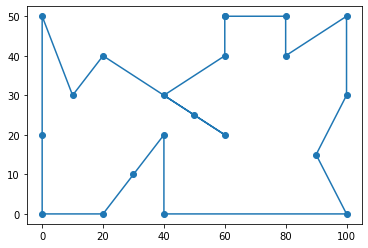


90
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  12  13  17  16  8  9  0  ...  14  10   2   3  15   4   5  19   

   19  fitness  
0   6      420  

[1 rows x 21 columns]


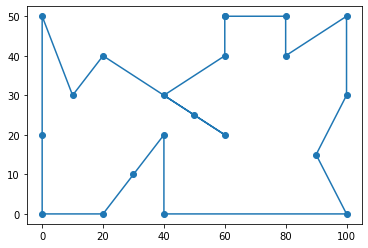


91
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  12  13  17  16  8  9  0  ...  14  10   2   3  15   4   5  19   

   19  fitness  
0   6      420  

[1 rows x 21 columns]


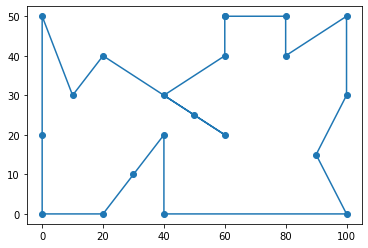


92
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  12  13  17  16  8  9  0  ...  14  10   2   3  15   4   5  19   

   19  fitness  
0   6      420  

[1 rows x 21 columns]


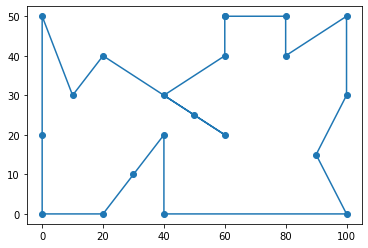


93
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  12  13  17  16  8  9  0  ...  14  10   2   3  15   4   5  19   

   19  fitness  
0   6      420  

[1 rows x 21 columns]


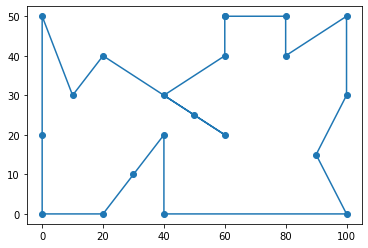


94
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  12  13  17  16  8  9  0  ...  14  10   2   3  15   4   5  19   

   19  fitness  
0   6      420  

[1 rows x 21 columns]


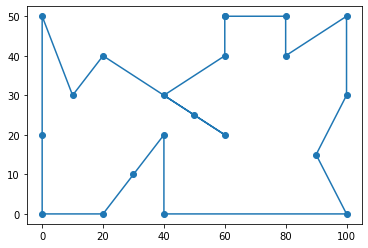


95
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  12  13  17  16  8  9  0  ...  14  10   2   3  15   4   5  19   

   19  fitness  
0   6      420  

[1 rows x 21 columns]


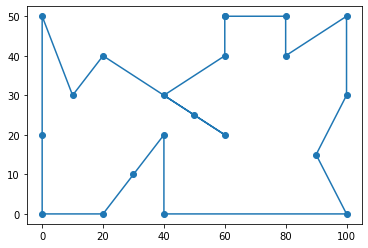


96
   0  1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  9  16  2  1  ...  14  10  13  12  15   3   4   5  19   

   fitness  
0      419  

[1 rows x 21 columns]


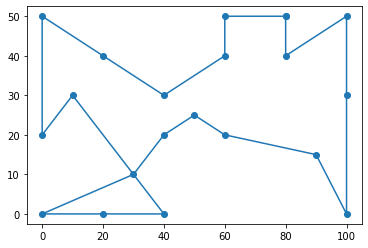


97
   0  1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  9  16  2  1  ...  14  10  13  12  15   3   4   5  19   

   fitness  
0      419  

[1 rows x 21 columns]


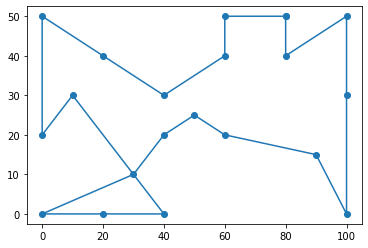


98
   0  1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  9  16  2  1  ...  14  10  13  12  15   3   4   5  19   

   fitness  
0      419  

[1 rows x 21 columns]


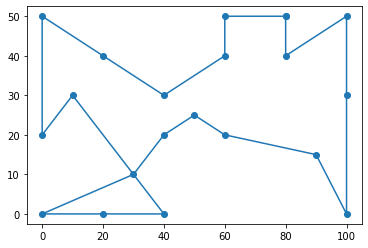


99
   0  1   2   3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  9  16  2  1  ...  14  10  13  12  15   3   4   5  19   

   fitness  
0      419  

[1 rows x 21 columns]


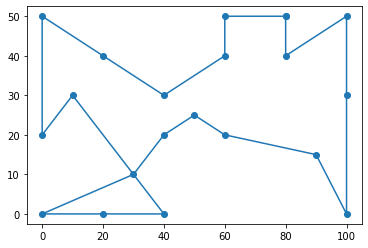


100
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  10  13  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      412  

[1 rows x 21 columns]


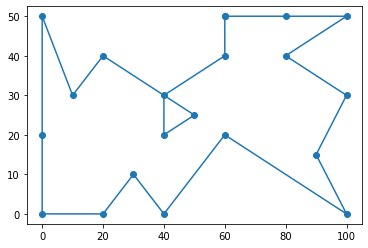


101
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  10  13  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      412  

[1 rows x 21 columns]


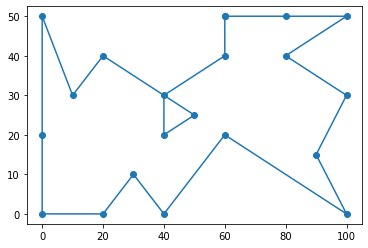


102
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  10  13  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      412  

[1 rows x 21 columns]


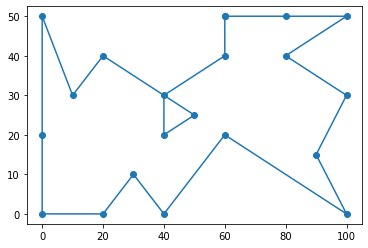


103
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  10  13  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      412  

[1 rows x 21 columns]


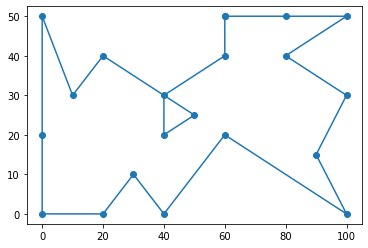


104
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  10  13  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      412  

[1 rows x 21 columns]


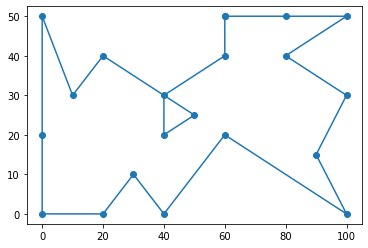


105
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  11  10  13  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      412  

[1 rows x 21 columns]


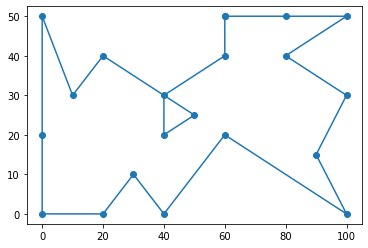


106
    0   1  2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  17  8  16  9  0  1  2  14  10  ...  13  12  19   6  15   3   4   5   7   

   fitness  
0      410  

[1 rows x 21 columns]


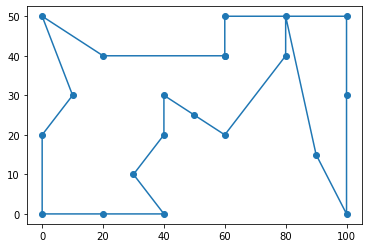


107
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


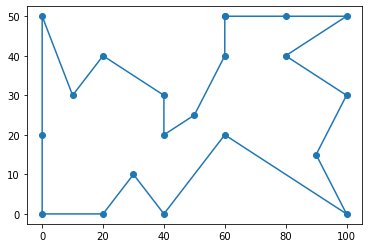


108
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


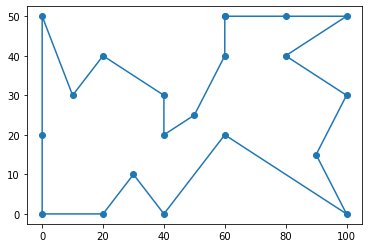


109
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


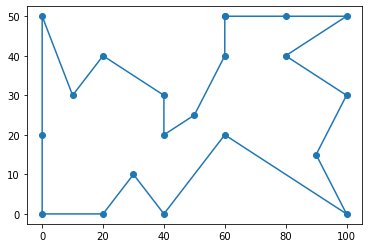


110
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


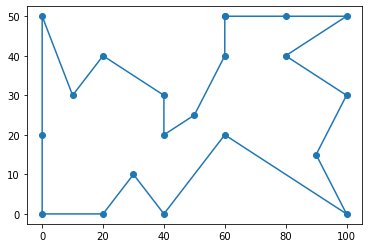


111
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


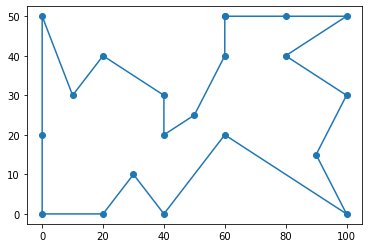


112
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


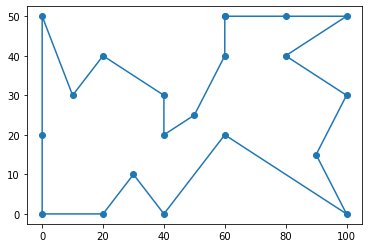


113
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


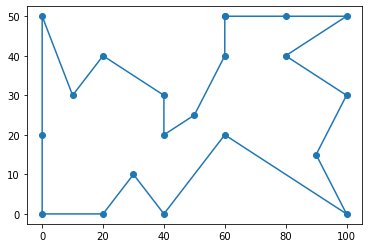


114
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


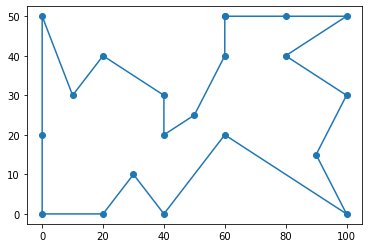


115
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


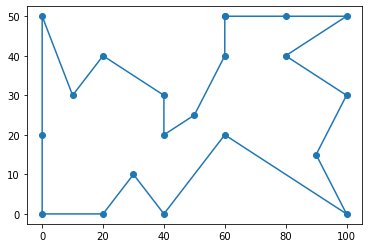


116
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


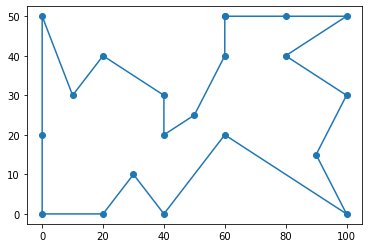


117
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


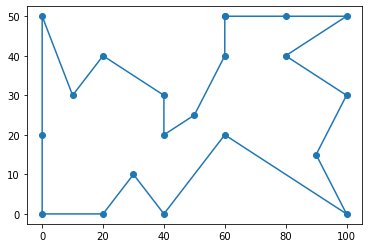


118
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


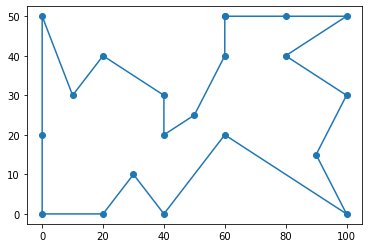


119
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


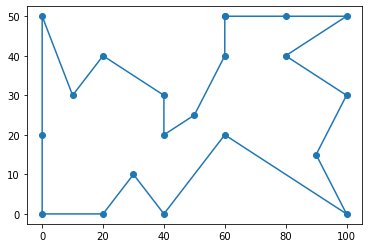


120
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


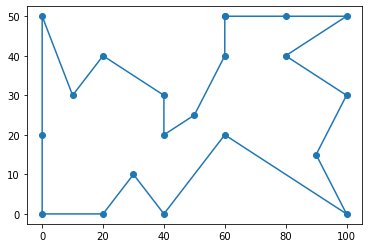


121
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


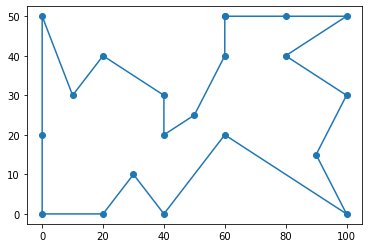


122
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


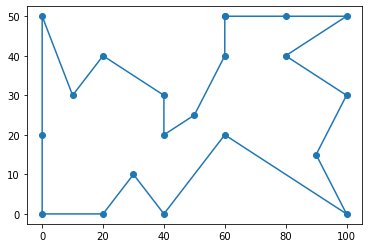


123
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


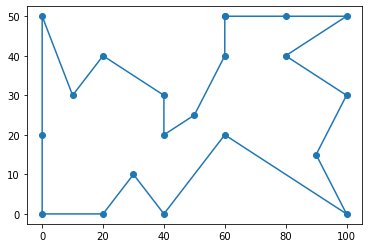


124
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


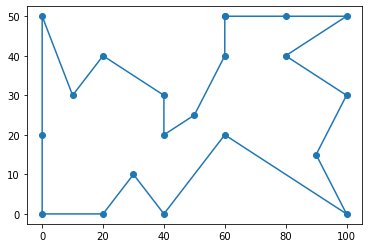


125
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


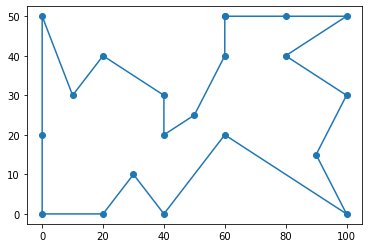


126
   0   1   2   3   4   5   6  7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  16  8  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      397  

[1 rows x 21 columns]


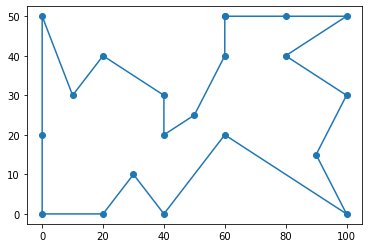


127
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


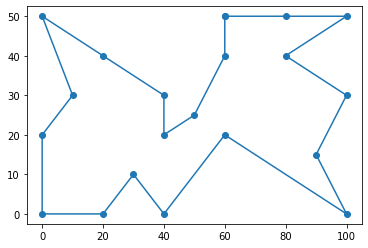


128
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


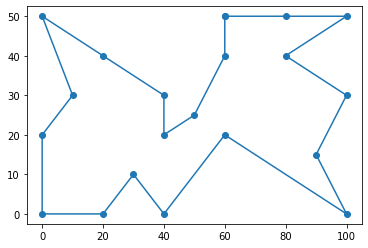


129
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


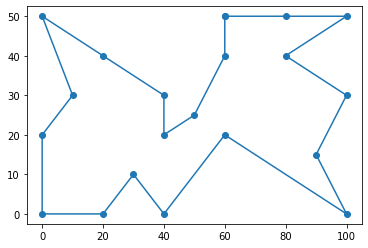


130
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


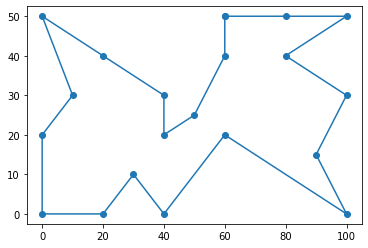


131
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


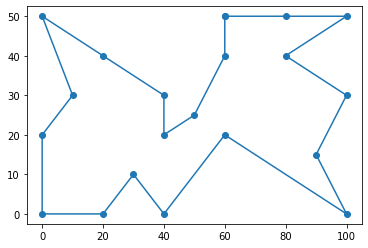


132
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


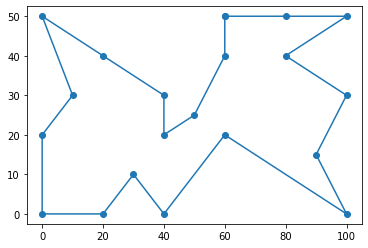


133
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


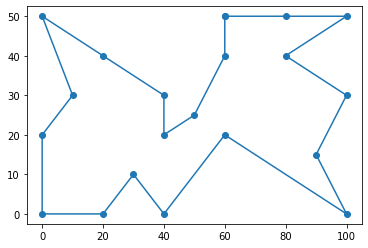


134
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


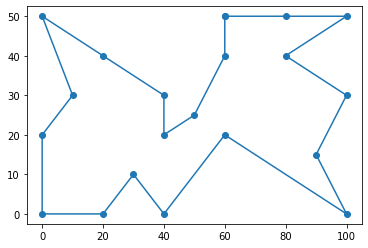


135
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


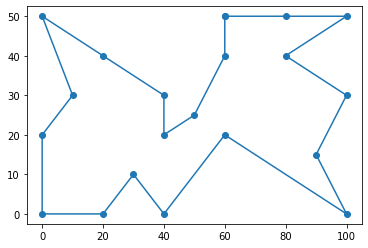


136
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


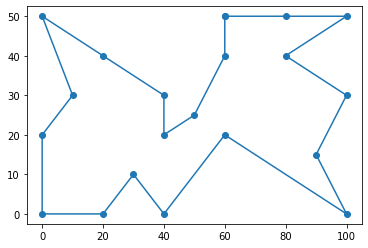


137
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


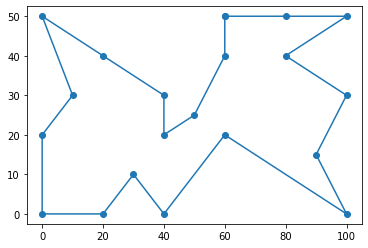


138
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


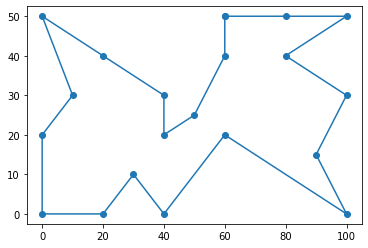


139
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


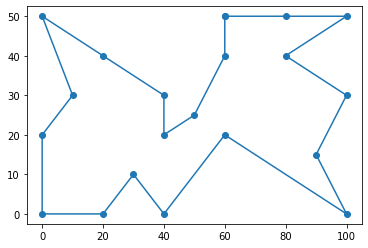


140
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


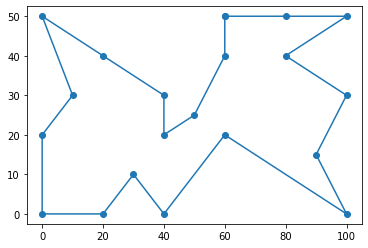


141
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


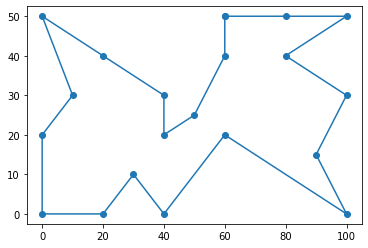


142
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


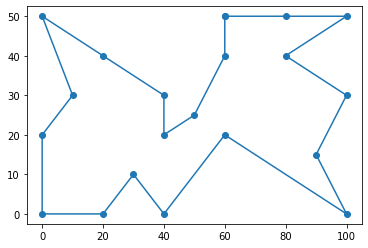


143
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


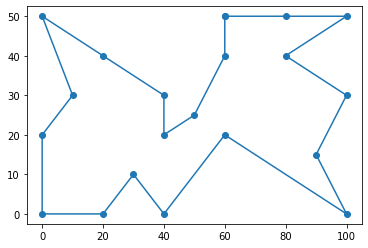


144
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


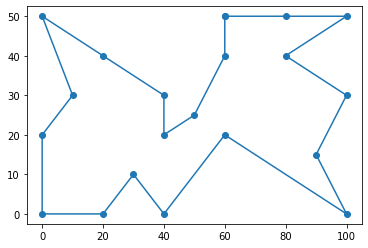


145
   0   1   2   3   4   5  6   7  8  9  ...  11  12  13  14  15  16  17  18  \
0  7  18  13  10  11  17  8  16  9  0  ...  14   2  12   3  15   4  19   5   

   19  fitness  
0   6      389  

[1 rows x 21 columns]


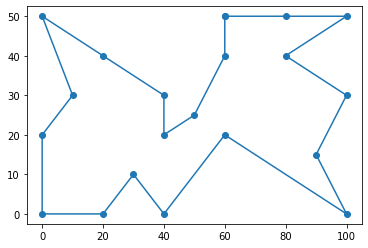


146
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


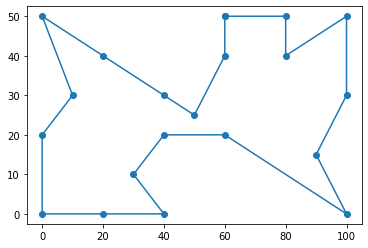


147
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


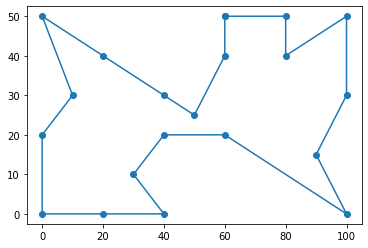


148
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


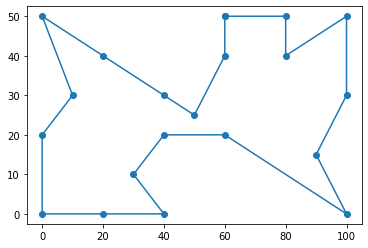


149
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


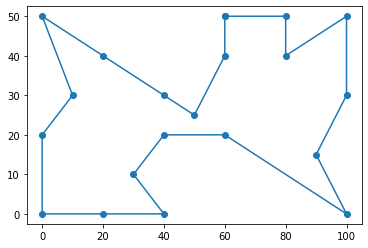


150
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


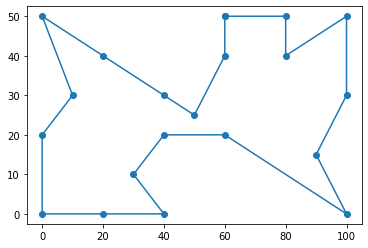


151
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


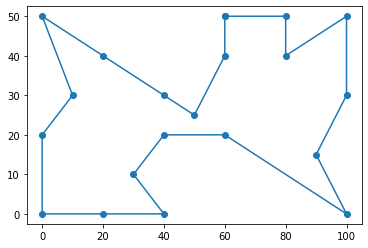


152
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


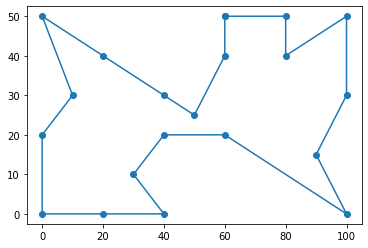


153
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


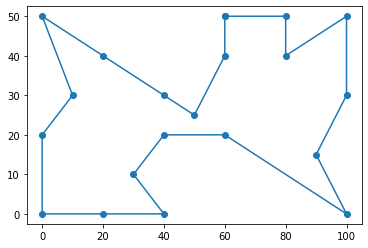


154
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


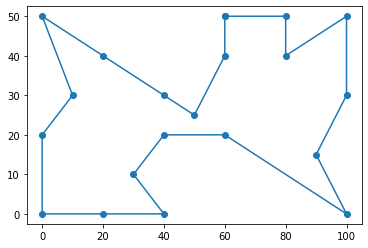


155
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


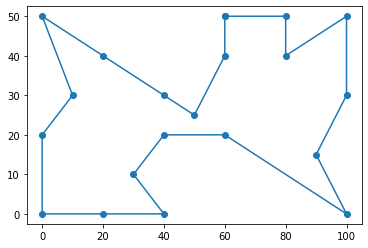


156
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


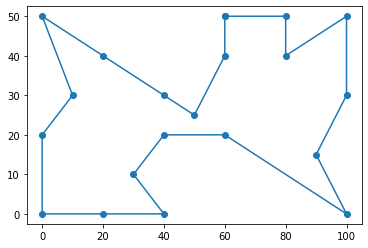


157
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


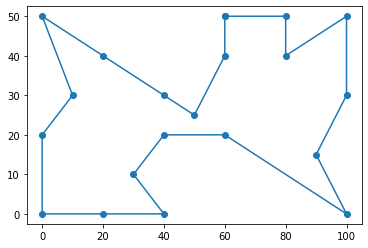


158
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


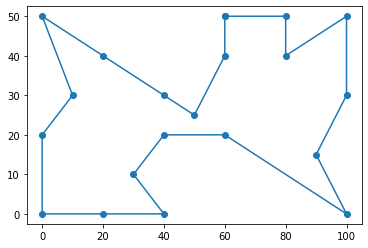


159
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


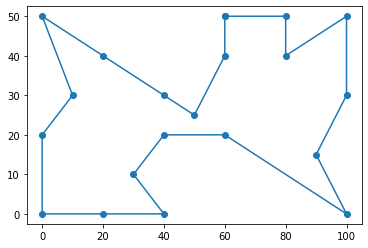


160
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


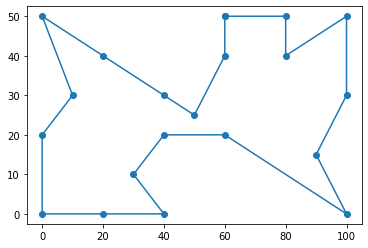


161
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


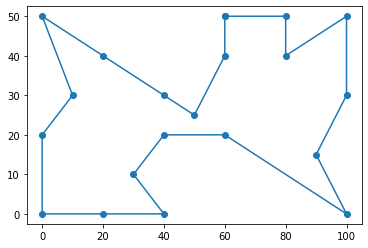


162
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


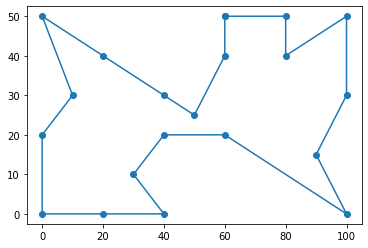


163
   0   1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  7  18  13  11  17  8  16  9  0  1  ...  14  10  12   3  15   4   5  19   6   

   fitness  
0      379  

[1 rows x 21 columns]


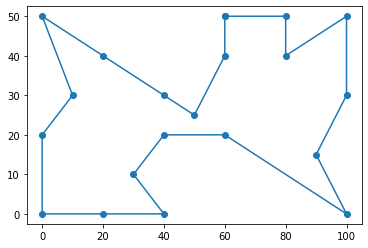


164
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


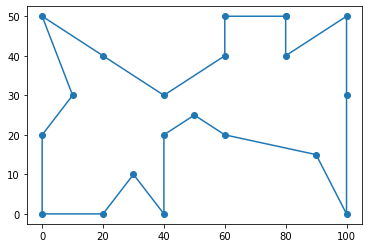


165
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


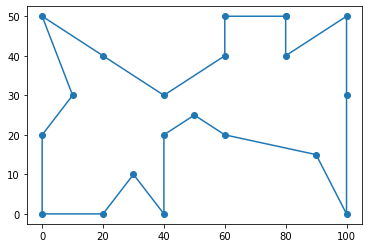


166
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


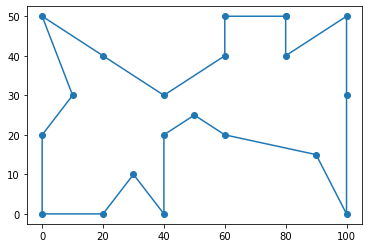


167
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


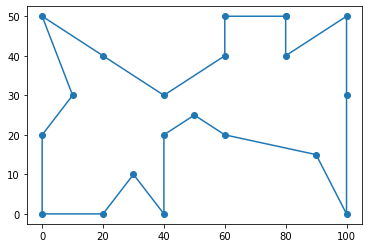


168
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


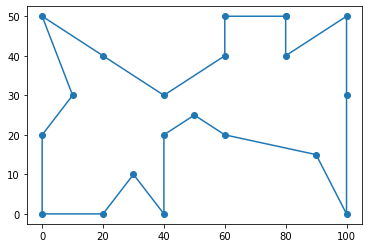


169
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


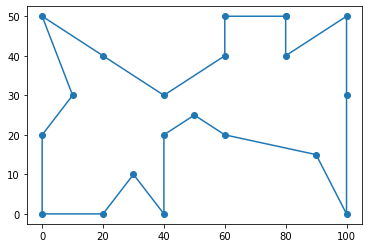


170
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


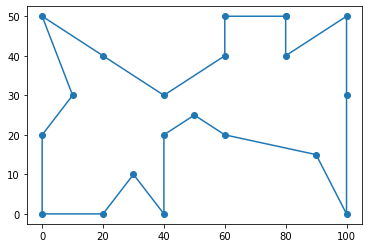


171
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


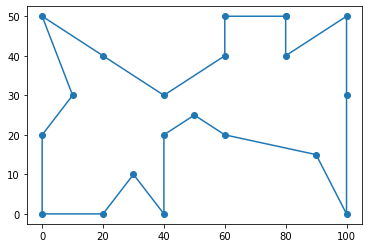


172
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


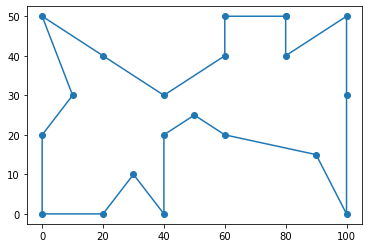


173
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


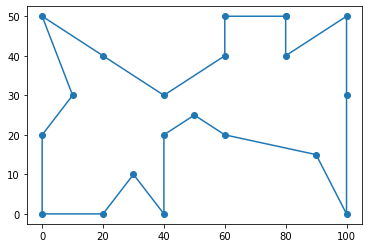


174
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


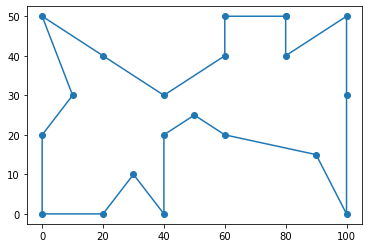


175
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


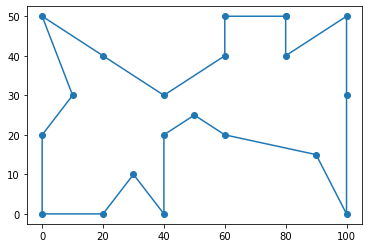


176
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


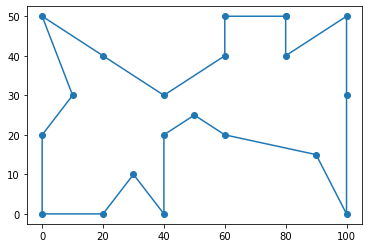


177
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


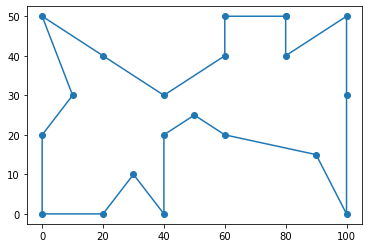


178
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


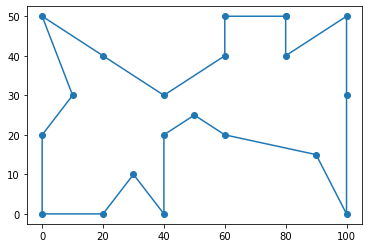


179
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


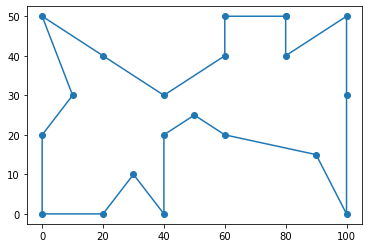


180
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


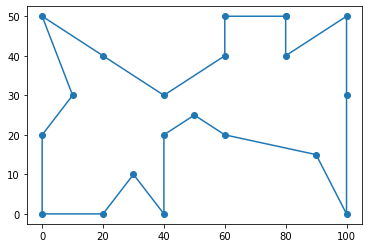


181
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


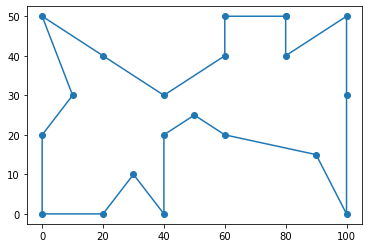


182
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


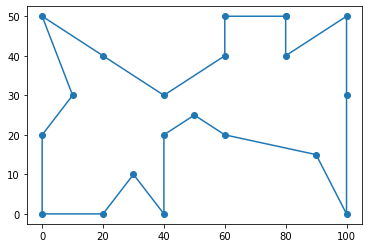


183
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


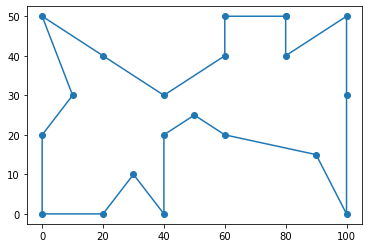


184
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


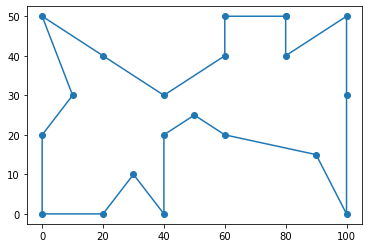


185
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


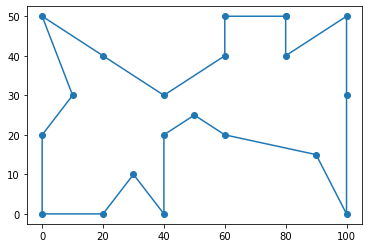


186
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


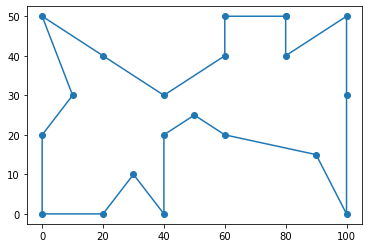


187
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


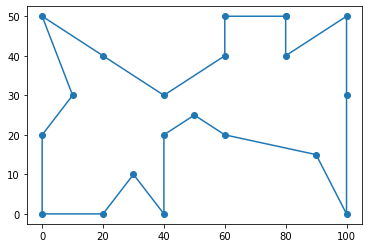


188
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


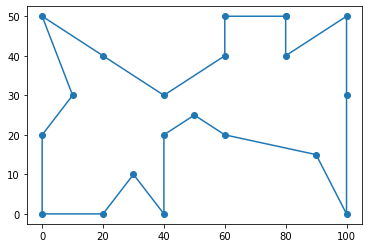


189
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


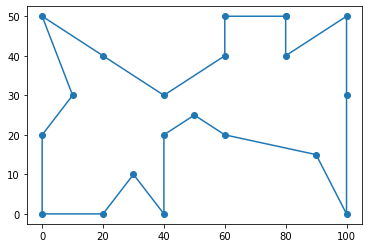


190
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


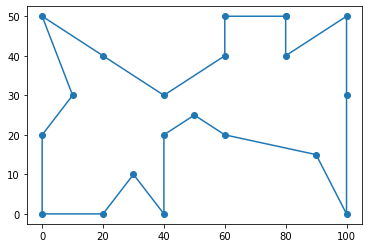


191
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


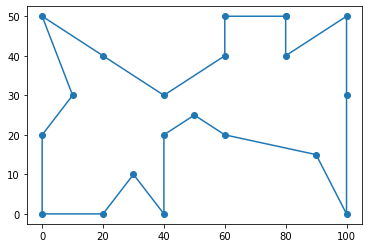


192
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


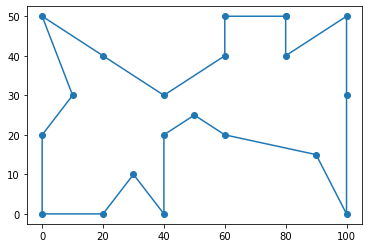


193
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


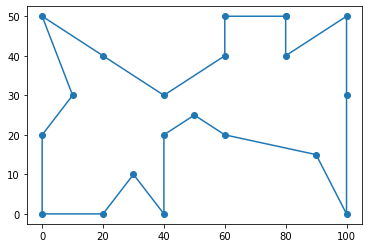


194
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


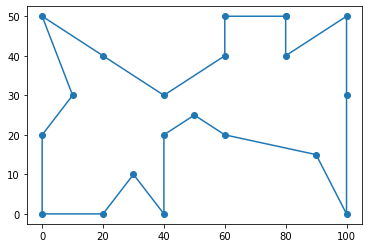


195
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


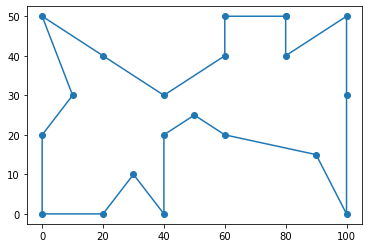


196
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


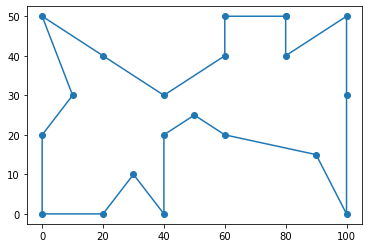


197
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


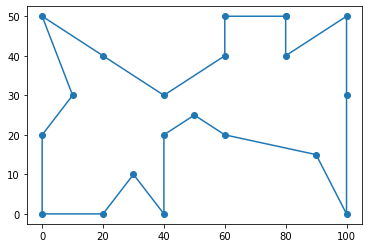


198
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


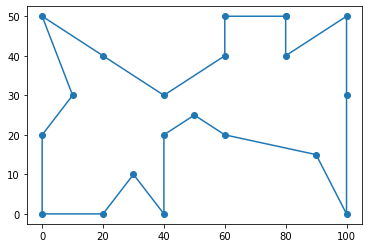


199
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


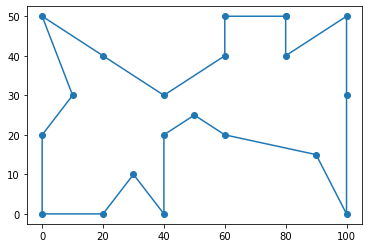


200
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


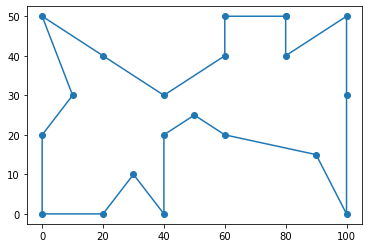


Populasi akhir
   0  1   2   3   4  5   6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  6  7  18  11  17  8  16  9  0  1  ...   2  10  13  12  15   3   4   5  19   

   fitness  
0      372  

[1 rows x 21 columns]


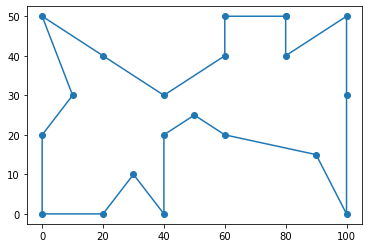

In [17]:
pop = createPopulation()
pop = fitness(pop)
print('Populasi awal')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    #popc = crossover(pop)
    #popc = fitness(popc)

    popm = mutation(pop)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)
    
    print()
    print(i)
    print(pop.head(1))
    plotSolution(pop)

print()
print('Populasi akhir')
print(pop.head(1))
plotSolution(pop)

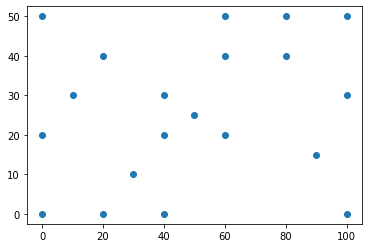

In [18]:
plt.scatter(x, y)
plt.show()